<a href="https://colab.research.google.com/github/alee-kolachi/neural_network_binary_and_multi_class_classification_with_pytorch/blob/main/neural_network_binary_and_multi_class_classification_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
from sklearn.datasets import make_circles

In [ ]:
n_samples = 1000

In [ ]:
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
#first 5 samples of X and y

x_sample = X[:5]
y_sample = y[:5]

print(x_sample, "\n\n", y_sample)

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]] 

 [1 1 1 1 0]


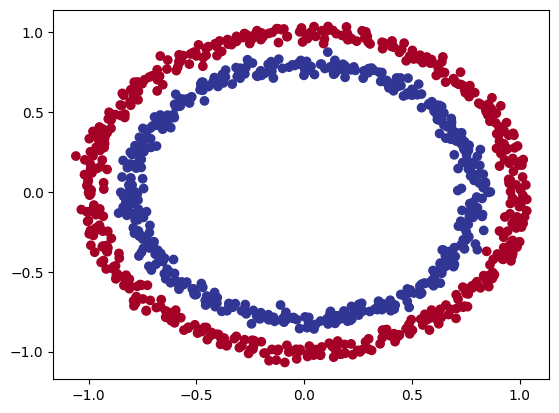

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
import torch

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cpu'

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=32)
    self.act     = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=32, out_features=8)
    self.act2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=8, out_features=1)

  def forward(self, x):
    x = self.layer_1(x)
    x = self.act(x)
    x = self.layer_2(x)
    x = self.act2(x)
    x = self.layer_3(x)
    return x   # raw logit

In [ ]:
model_0 = CircleModelV0()

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()    # important: accepts logits
optimizer = torch.optim.Adam(model_0.parameters(), lr=1e-4
                             )

In [ ]:
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  accuracy = correct / len(y_pred) * 100
  return accuracy

In [ ]:
epochs = 100000

for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    loss = loss_fn(y_logits, y_train.float())

    y_pred = torch.round(torch.sigmoid(y_logits))
    acc = accuracy(y_train, y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_loss = loss_fn(test_logits, y_test.float())

        test_pred = torch.round(torch.sigmoid(test_logits))
        test_accuracy = accuracy(y_test, test_pred)

    if epoch % 10000 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.5f}, Accuracy: {acc:.2f}, Test Loss: {test_loss:.5f}, Test Accuracy: {test_accuracy:.2f}")

Epoch: 0, Loss: 0.00343, Accuracy: 100.00, Test Loss: 0.02529, Test Accuracy: 99.00
Epoch: 10000, Loss: 0.00139, Accuracy: 100.00, Test Loss: 0.01566, Test Accuracy: 99.00
Epoch: 20000, Loss: 0.00056, Accuracy: 100.00, Test Loss: 0.01440, Test Accuracy: 99.00
Epoch: 30000, Loss: 0.00023, Accuracy: 100.00, Test Loss: 0.01277, Test Accuracy: 99.00
Epoch: 40000, Loss: 0.00009, Accuracy: 100.00, Test Loss: 0.01185, Test Accuracy: 99.00
Epoch: 50000, Loss: 0.00004, Accuracy: 100.00, Test Loss: 0.00947, Test Accuracy: 99.50
Epoch: 60000, Loss: 0.00001, Accuracy: 100.00, Test Loss: 0.00752, Test Accuracy: 99.50
Epoch: 70000, Loss: 0.00001, Accuracy: 100.00, Test Loss: 0.00562, Test Accuracy: 100.00
Epoch: 80000, Loss: 0.00000, Accuracy: 100.00, Test Loss: 0.00390, Test Accuracy: 100.00
Epoch: 90000, Loss: 0.00000, Accuracy: 100.00, Test Loss: 0.00240, Test Accuracy: 100.00


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import torch

NUM_OF_CLASSES = 5
NUM_OF_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_OF_FEATURES,
                            centers=NUM_OF_CLASSES,
                            cluster_std=1,
                            random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

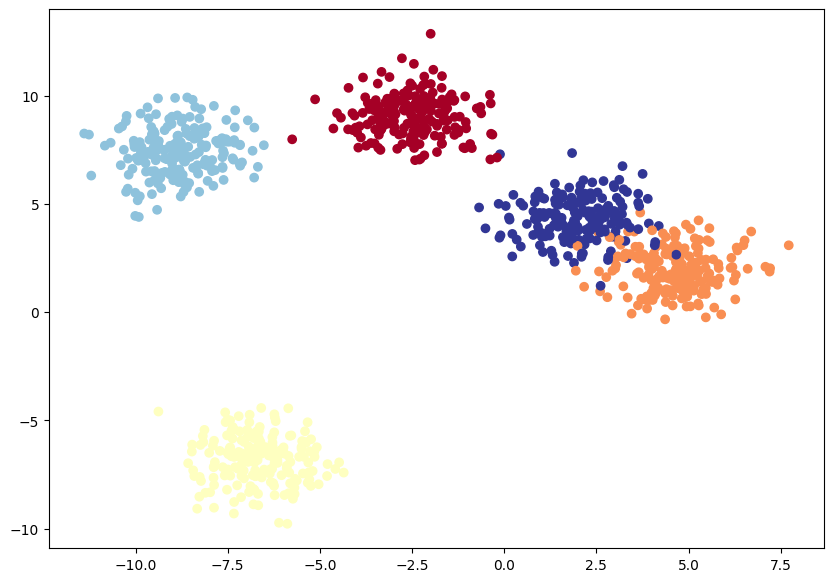

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
import torch.nn as nn

class MultiClassClassification(nn.Module):
  def __init__(self, input_features=2, output_features=5, hidden_units=8):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2, hidden_units*2),
        nn.ReLU(),
        nn.Linear(hidden_units*2, hidden_units*2),
        nn.ReLU(),
        nn.Linear(hidden_units*2, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, 5)
    )

  def forward(self, x):
    return self.model(x)

In [ ]:
model = MultiClassClassification()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

In [ ]:
epochs = 10000

for epoch in range(epochs):
  model.train()

  y_logits = model(X_blob_train)
  output = torch.softmax(y_logits, dim=1)
  #print(output.dtype, y_logits.dtype)
  loss = loss_fn(output, y_blob_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_blob_test)
    test_output = torch.softmax(test_logits, dim=1)
    test_loss = loss_fn(test_output, y_blob_test)

  if epoch % 1000 == 0:
    print(f"Epoch: {epoch}, Training_Loss: {loss}, Test_loss: {test_loss}")
    train_acc = (y_logits.argmax(dim=1) == y_blob_train).float().mean().item()
    test_acc  = (test_logits.argmax(dim=1) == y_blob_test).float().mean().item()
    print(f"Train acc: {train_acc:.3f}, Test acc: {test_acc:.3f}")


Epoch: 0, Training_Loss: 1.6254925727844238, Test_loss: 1.6308592557907104
Train acc: 0.205, Test acc: 0.180
Epoch: 1000, Training_Loss: 1.3115086555480957, Test_loss: 1.3047704696655273
Train acc: 0.613, Test acc: 0.590
Epoch: 2000, Training_Loss: 1.021485686302185, Test_loss: 1.0238033533096313
Train acc: 0.959, Test acc: 0.965
Epoch: 3000, Training_Loss: 0.9407306909561157, Test_loss: 0.941173791885376
Train acc: 0.978, Test acc: 0.970
Epoch: 4000, Training_Loss: 0.9338640570640564, Test_loss: 0.9347258806228638
Train acc: 0.978, Test acc: 0.975
Epoch: 5000, Training_Loss: 0.9314164519309998, Test_loss: 0.9326324462890625
Train acc: 0.978, Test acc: 0.970
Epoch: 6000, Training_Loss: 0.9300959706306458, Test_loss: 0.9316360950469971
Train acc: 0.978, Test acc: 0.970
Epoch: 7000, Training_Loss: 0.9292356967926025, Test_loss: 0.93108069896698
Train acc: 0.978, Test acc: 0.970
Epoch: 8000, Training_Loss: 0.9286220073699951, Test_loss: 0.9306966662406921
Train acc: 0.979, Test acc: 0.970

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_decision_boundaries(model, X, y, X_test=None, class_names=None, pca_components=2, grid_steps=300):
    """
    Plots multiclass decision boundaries for a PyTorch model.
    - model: PyTorch model (should accept shape [N, D] tensors).
    - X: training inputs (torch.Tensor or np.array) shape [N, D].
    - y: training labels (torch.Tensor or np.array) shape [N].
    - X_test: optional test inputs to plot on top.
    - class_names: optional list of names for legend.
    - pca_components: if D > 2, reduce to 2 via PCA.
    - grid_steps: resolution of meshgrid.
    """
    model_cpu = model.to('cpu')
    model_cpu.eval()

    # Convert to numpy
    X_np = X.detach().cpu().numpy() if isinstance(X, torch.Tensor) else np.array(X)
    y_np = y.detach().cpu().numpy() if isinstance(y, torch.Tensor) else np.array(y)
    X_test_np = None
    if X_test is not None:
        X_test_np = X_test.detach().cpu().numpy() if isinstance(X_test, torch.Tensor) else np.array(X_test)

    # If features > 2, do PCA projection
    D = X_np.shape[1]
    if D > 2:
        pca = PCA(n_components=2)
        X_proj = pca.fit_transform(X_np)
        if X_test_np is not None:
            X_test_proj = pca.transform(X_test_np)
        else:
            X_test_proj = None
        projection = lambda arr: pca.transform(arr)
    else:
        X_proj = X_np
        X_test_proj = X_test_np
        projection = lambda arr: np.array(arr)

    # Build meshgrid over projected 2D space
    x_min, x_max = X_proj[:,0].min() - 0.5, X_proj[:,0].max() + 0.5
    y_min, y_max = X_proj[:,1].min() - 0.5, X_proj[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_steps),
                         np.linspace(y_min, y_max, grid_steps))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # If we projected with PCA, we must inverse-transform the grid to original input space before model call.
    # For D>2: grid_orig = pca.inverse_transform(grid)
    if D > 2:
        grid_orig = pca.inverse_transform(grid)
    else:
        grid_orig = grid

    # Convert grid to torch tensor
    grid_t = torch.from_numpy(grid_orig).float()

    # Run model on grid in inference mode and get predicted class
    with torch.inference_mode():
        logits = model_cpu(grid_t)            # shape [M, C]
        preds = logits.argmax(dim=1).cpu().numpy()

    Z = preds.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.35)  # decision regions

    # scatter the training points (projected)
    scatter = plt.scatter(X_proj[:,0], X_proj[:,1], c=y_np, edgecolor='k', s=40)
    if X_test_proj is not None:
        plt.scatter(X_test_proj[:,0], X_test_proj[:,1], marker='x', c='none', edgecolor='k', s=30, linewidths=1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('PC1' if D>2 else 'X0')
    plt.ylabel('PC2' if D>2 else 'X1')
    plt.title('Decision boundary (model predictions)')

    if class_names is not None:
        # build legend from scatter handle + class names
        handles, _ = scatter.legend_elements()
        plt.legend(handles, class_names, title="Classes")
    else:
        plt.legend(*scatter.legend_elements(), title="Classes")

    plt.tight_layout()
    plt.show()

# Example call:
# plot_decision_boundaries(model, X_blob_train, y_blob_train, X_test=X_blob_test)


/tmp/ipython-input-4126746142.py:73: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_proj[:,0], X_test_proj[:,1], marker='x', c='none', edgecolor='k', s=30, linewidths=1)


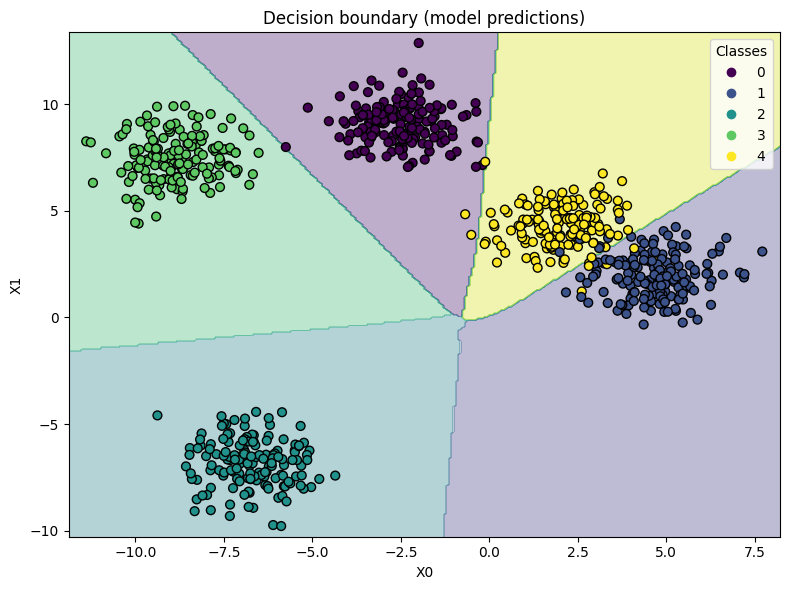

In [ ]:
plot_decision_boundaries(model, X_blob_train, y_blob_train, X_test=X_blob_test)